# SOLUTION OF TASK 1


**THE SPARK FOUNDATION**

**Data Science & Business Analytics Tasks Internship**

# **BY : ABHISHEK KUMAR**
*●  Through the task predict the percentage of an student based on the no. of study hours.*



*● This is a simple linear regression task as it involves just 2 variables.*


*● You can use R, Python, SAS Enterprise Miner or any other tool*


*● Data can be found at http://bit.ly/w-data*


*● What will be predicted score if a student studies for 9.25 hrs/ day?*

# IMPORTING LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**FETCHING THE DATA**

In [33]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data fetching successfully")

print(df)

Data fetching successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


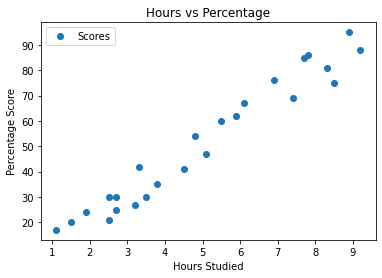

In [34]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [35]:
#to check any missing data 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**splitting the data in dependent and indepenent variable**

In [36]:
X = df.iloc[:, :-1].values  #independent variable
y = df.iloc[:, 1].values   #dependent variable

In [37]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


TRAIN-TEST SPLITTING

In [38]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

**Linear Regression**

In [39]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


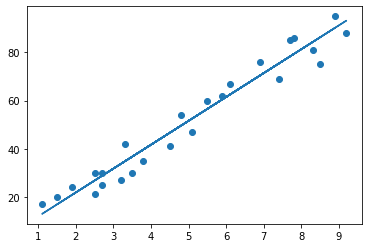

In [40]:
# Plotting the regression line Y = mx+c
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# PREDICTION

In [41]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [42]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**MODEL EVALUATION**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics

In [43]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [44]:
#Explained varience scores: 1 is perfect prediction
from sklearn.metrics import r2_score
print("Varience score: %.2f" % r2_score(y_test,y_pred))

Varience score: 0.95


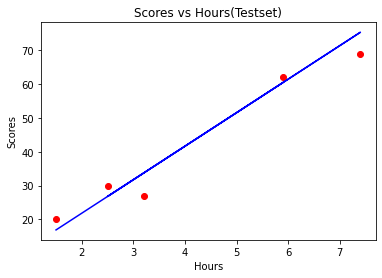

In [45]:
#plotting the graph for test dataset
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,y_pred, color = 'blue')
plt.title('Scores vs Hours(Testset)')
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.show()

# SOLUTION

In [46]:
# You can also test with your own data
hours = ([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


If the student study 9.25 hr/day.then,as per model prediction marks will get by student is 93.69